## 問題

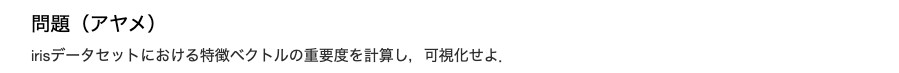

In [1]:
from IPython.display import Image
Image('iris.png')

## 解答

In [2]:
import plotly.express as px

iris = px.data.iris()
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['species_id']

In [3]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X, y)

RandomForestClassifier()

In [4]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rf, X, y)
result.importances_mean

array([0.01466667, 0.01333333, 0.33866667, 0.16666667])

### 可視化

In [5]:
import pandas as pd

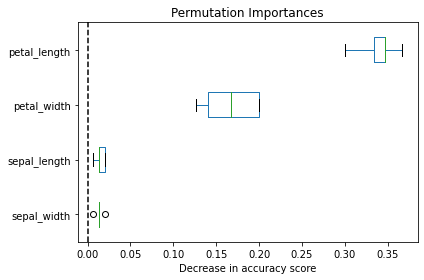

In [6]:
sorted_importances_idx = result.importances_mean.argsort()

importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)

ax = importances.plot.box(vert=False, whis=10)
ax.set_title('Permutation Importances')
ax.axvline(x=0, color='k', linestyle='--')
ax.set_xlabel('Decrease in accuracy score')
ax.figure.tight_layout()

In [7]:
importances

,sepal_width,sepal_length,petal_width,petal_length
0,0.013333,0.006667,0.200000,0.366667
1,0.013333,0.013333,0.140000,0.300000
2,0.020000,0.013333,0.126667,0.333333
3,0.013333,0.020000,0.166667,0.346667
4,0.006667,0.020000,0.200000,0.346667
